<h1>Imports and API setups<h1>

In [2]:
from __future__ import print_function    # (at top of module)
import warnings
#warnings.filterwarnings('always')
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import sys
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
from matplotlib.pyplot import figure
import math
import seaborn as sns
import config

## Read data from CSV

In [3]:
# Read the data from the file
data = pd.read_csv('Data/data_500_entries_youtube.csv')
data.head()
print("Number of entries in original data: " + str(len(data.index)))

Number of entries in original data: 570


## Clean the data

In [4]:
data = data.drop_duplicates(subset=['song_id'], keep='first')
print("Number of entries in original data after cleaning: " + str(len(data.index)))

Number of entries in original data after cleaning: 570


In [5]:
data = data[data.popularity > 50]
print("Number of entries in original data after cleaning: " + str(len(data.index)))

Number of entries in original data after cleaning: 570


## Label the data according to threshold for plotting

In [6]:
# Label data according to a threshold for nicer plotting
labeled_data = data.copy()
threshold = 90
labels = []

# The threshold is on Popularity, see above for description of that feature
for item in data['popularity']:
    if item > threshold:
        labels.append(1)
    else:
        labels.append(0)
labeled_data['is_popular'] = labels
data = labeled_data.copy()

## Analyzing the data

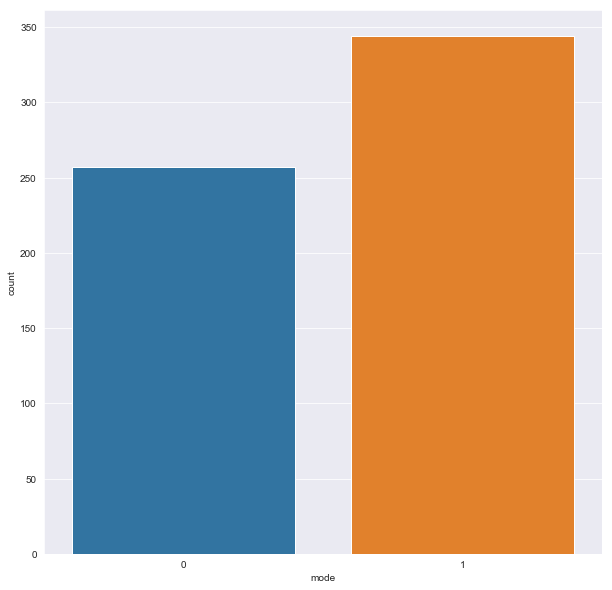

In [45]:
sns.countplot(x="mode", data=data)

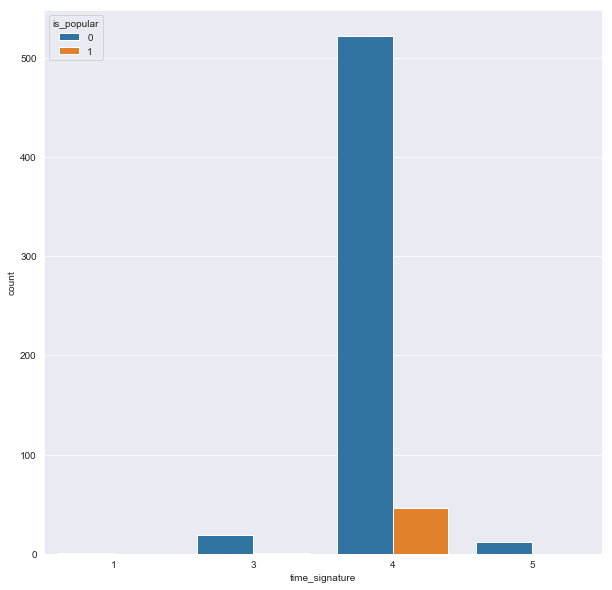

In [46]:
sns.countplot(x="time_signature", hue="is_popular", data=labeled_data)

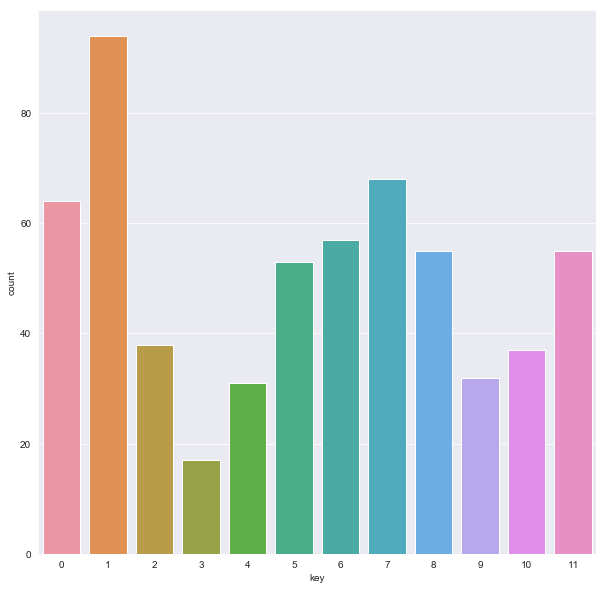

In [47]:
sns.countplot(x="key", data=data)

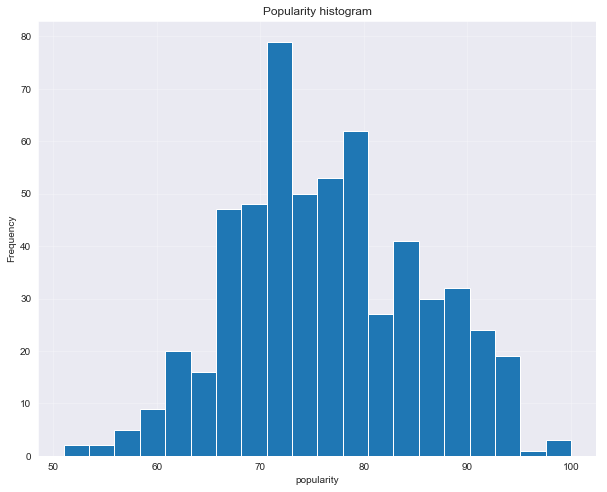

In [23]:
data['popularity'].plot.hist(bins=20, rwidth=10,figsize=(10,8), histtype="bar")
plt.xlabel('popularity')
plt.title("Popularity histogram")
plt.grid(alpha=0.3)

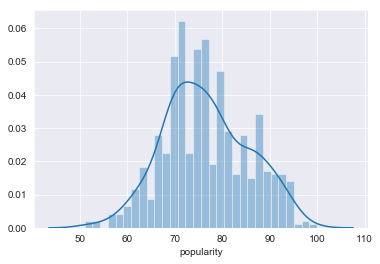

In [16]:
sns.set_style('darkgrid')
sns.distplot(data["popularity"],bins=30, norm_hist=False)

Text(0.5,1,'Duration and popularity')

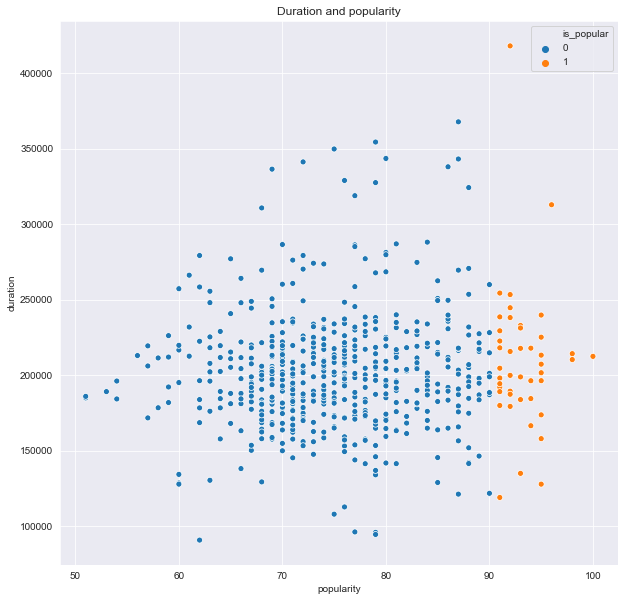

In [50]:
sns.scatterplot(x="popularity", y = "duration" , hue = "is_popular", data=labeled_data).set_title("Duration and popularity")

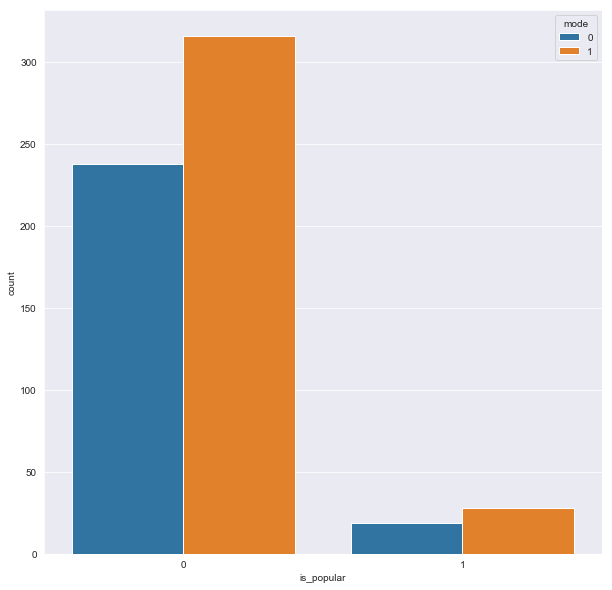

In [51]:
sns.countplot(x="is_popular", hue = "mode", data=labeled_data)

Text(0.5,1,'Instrumentalness and popularity')

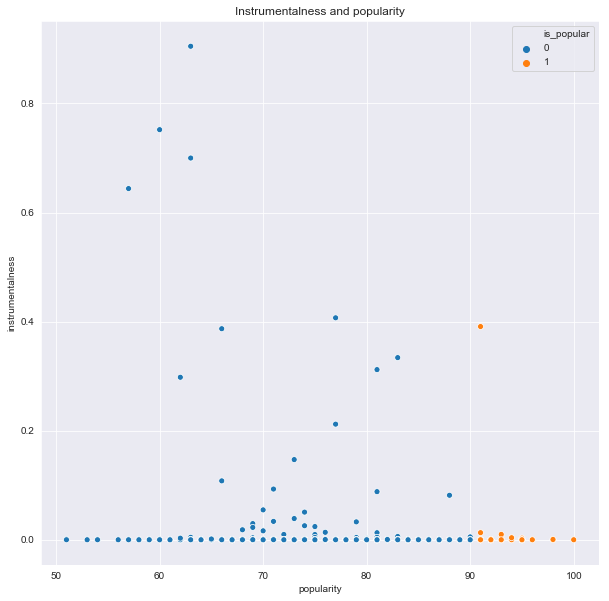

In [52]:
sns.scatterplot(x="popularity", y = "instrumentalness" , hue = "is_popular", data=labeled_data).set_title("Instrumentalness and popularity")

Text(0.5,1,'Loudness and popularity')

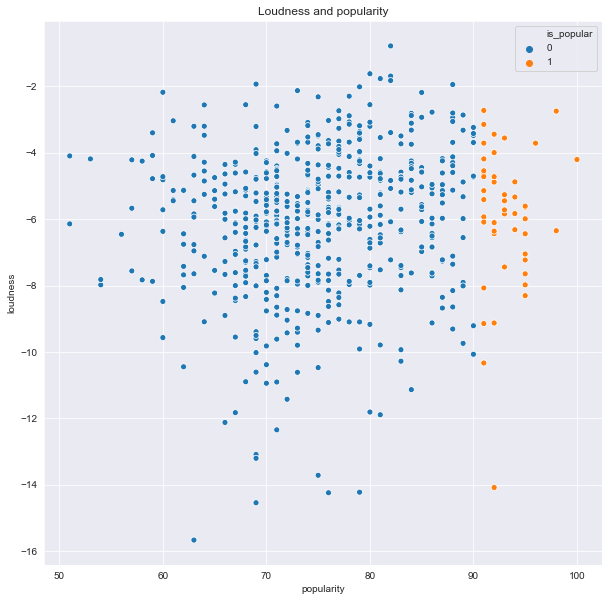

In [53]:
sns.scatterplot(x="popularity", y = "loudness" , hue = "is_popular", data=labeled_data).set_title("Loudness and popularity")